In [1]:
using Plots, ComplexPhasePortrait, ApproxFun
gr();

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
$$

# M3M6: Methods of Mathematical Physics

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk


# Lecture 3: Cauchy's integral formula and Taylor series


This lecture we cover

1. Deformation of contours
2. Cauchy's integral formula
    - Application: Numerical differentiation
3. Taylor series

## Deformation of contours

**Definition (Domain)** A _domain_ is a non-empty, open and connected set $D \subset {\mathbb C}$.

**Definition (Homotopic)** Two closed contours $\gamma_1 : [a,b] \rightarrow D$ and $\gamma_2 \rightarrow D$ in a domain $D$ are _homotopic_ if they can be continuously deformed to one-another while remaining in $D$. 

**Theorem (Deformation of contours)** Let $f(z)$ be holomorphic in a domain $D$. Let $\gamma_1$ and $\gamma_2$ be two homotopic contours. Then
$$
    \int_{\gamma_1} f(z) dz = \int_{\gamma_2} f(z) dz
$$   

**Definition (Simply connected)** A domain is _simply connected_ if every closed contour is homotoic to a point.

**Corollary (Deformation of contours on simply connected domains)** Let $f(z)$ be holomorphic in a simply-connected domain $D$. If $\gamma_1$ and $\gamma_2$ are two contours in $D$ with the same endpoints, then

$$
    \int_{\gamma_1} f(z) dz = \int_{\gamma_2} f(z) dz
$$   

_Demonstration_ We can test this experimentally: in the following, the integral (implemented as `sum`) over two different contours returns the same vaule (up to numerical precision)

In [2]:
f = Fun( z -> exp(z), Arc(0.,1.,(0,π/2)))  # Holomorphic!
f̃ = Fun( z -> exp(z), Segment(1,im))  # Holomorphic!

sum(f)  , sum(f̃)

(-2.1779795225909058 + 0.8414709848078968im, -2.1779795225909053 + 0.8414709848078966im)

Here is a depection of the two contours:

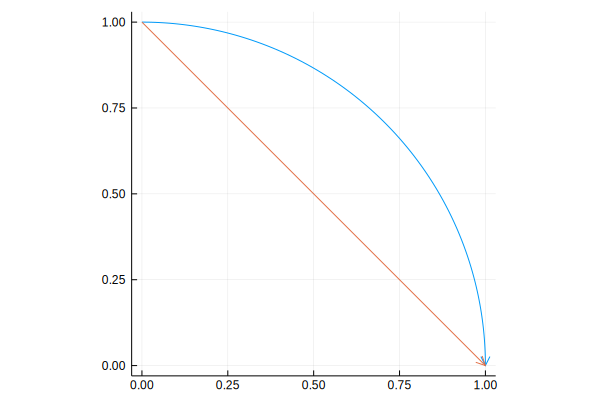

In [11]:
plot(domain(f); ratio=1.0, legend=false, arrow=true)
plot!(domain(f̃), arrow=true)

## Orientation of contours

Contours are _oriented_: there is a notion of "left" and "right" inherited from $[a,b]$. For closed contours, there is as notion of positive/negative orientation:

**Definition (Positive/negative orientation)** Let $\gamma$ be a simple closed contour and $z$ in the interior of $\gamma$.  We say that $\gamma$ is _positively oriented_ if 
$${1 \over 2 \pi i} \oint_\gamma {d\zeta \over \zeta - z} = 1$$
It is _negatively oriented_ if the reversed contour $\gamma_{\rm reversed}(t) = \gamma(b+a-t)$ for $t \in [a,b]$ is positively oriented, or equivalentally
$${1 \over 2 \pi i} \oint_\gamma {d\zeta \over \zeta - z} = -1$$


_Demonstration_ Here we see numerically that $1/z$ is positively oriented:

In [4]:
sum(Fun(z -> 1/z, Circle()))/(2π*im)

1.0 + 1.2545118101832475e-16im

## Cauchy's integral formula

Cauchy's integral formula allows us to recover a function from knowlerdge of its values on a surrounding contour:

**Theorem (Cauchy integral formula)** Suppose $f$ is holomorphic inside and on a positively oriented, simple, closed contour $\gamma$. Then
$$
f(z) = {1 \over 2 \pi i} \oint_\gamma {f(\zeta) \over \zeta - z} d \zeta$$

_Demonstration_ This shows numerically that we can calculate $\E^{0.1}$ by integrating over a circle that surrounds $z = 0.1$:

In [5]:
γ = Circle()
ζ = Fun(γ)
z = 0.1
sum(exp(ζ)/(ζ-z)) /(2π*im)  - exp(z)

0.0 - 0.0im

Not only do we know $f$, we also know that $f$ is infinitely-differentiable, and we know all its values:

**Corollary (Cauchy integral formula for derivatives)** Suppose $f$ is holomorphic inside and on a positively oriented, simple, closed contour $\gamma$. Then $f$ is infinitely-differentiable at $z$ and 
$$
f^{(k)}(z) = {k! \over 2 \pi i} \oint_\gamma {f(\zeta) \over (\zeta - z)^{k+1}} d \zeta$$

_Demonstration_ Here we show that we can recover $\E^z$ using any of the derivatives:

In [6]:
k=10
factorial(1.0k)*sum(exp(ζ)/(ζ-z)^(k+1))/(2π*im)  - exp(z)

1.7801382590221237e-10 - 0.0im

In [7]:
z = 0.1
k = 5
factorial(1.0k)*sum(exp(ζ)/(ζ-z)^(k+1))/(2π*im) - exp(z)

4.218847493575595e-15 - 0.0im

## Taylor series


**Theorem (Taylor)** Suppose $f$ is holomorphic in a ball $B(z_0,r)$. Then inside this ball we have
$$
    f(z) = \sum_{k=0}^\infty {f^{(k)}(z_0) \over k!} (z-z_0)^k
$$    


_Examples_
1. $\E^z$
2. $1/(1-z)$
3. $\sec z$
4. $\sqrt z$

here we plot the $n$-term Taylor approximation of $\E^z$:

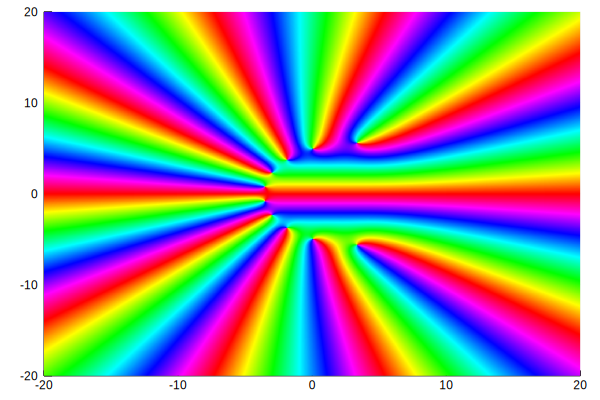

In [8]:
expⁿ = (n,z) -> sum(z^k/factorial(1.0k) for k=0:n)
phaseplot(-20..20, -20..20, z -> expⁿ.(10,z))

And now the $n$-term Taylor approximation to $1/(1-z)$:

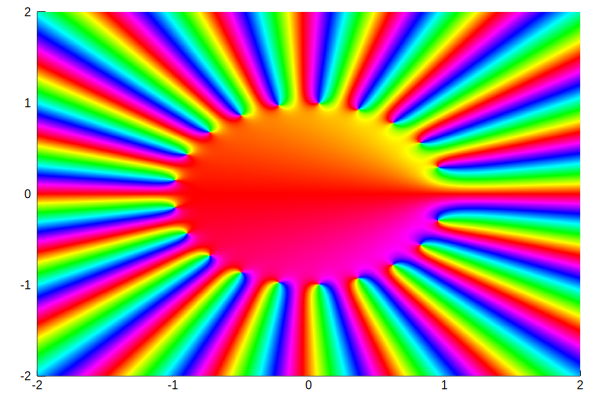

In [9]:
geometricⁿ = (n,z) -> sum(z^k for k=0:n)

phaseplot(-2..2, -2..2, z -> geometricⁿ.(20,z))

And here the $n$-term Taylor approximation of $\sqrt z$ near $z_0$:

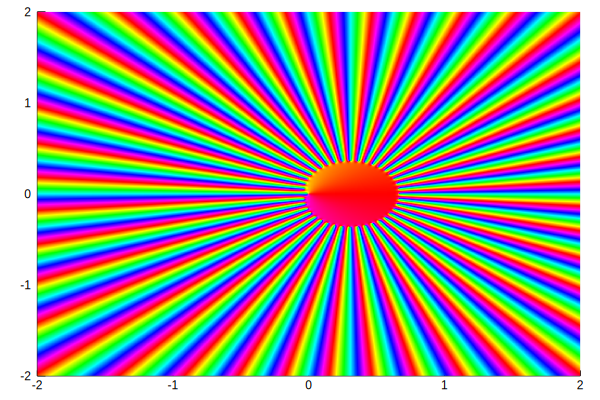

In [10]:
function sqrtⁿ(n,z,z₀) 
    ret = sqrt(z₀)
    c = 0.5/ret*(z-z₀)
    for k=1:n
        ret += c
        c *= -(2k-1)/(2*(k+1)*z₀)*(z-z₀)
    end
    ret
end


z₀ = 0.3
n = 40
phaseplot(-2..2, -2..2, z -> sqrtⁿ.(n,z,z₀))